In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
links = pd.read_csv('/content/drive/MyDrive/links.csv')
movies = pd.read_csv('/content/drive/MyDrive/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')
tags = pd.read_csv('/content/drive/MyDrive/tags.csv')

In [40]:

n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
print(f'user number = {n_users}')
print(f'user movies = {n_movies}')

user number = 610
user movies = 9724


In [41]:
movie = movies.iloc[:,2:].to_numpy()
rating_pivot = ratings.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
rating = rating_pivot.to_numpy()
tag = tags.iloc[:,2:].to_numpy()
link = links.iloc[:,2:].to_numpy()
helper = (rating>0).astype(int)
N = np.count_nonzero(helper==1)
N

100836

In [42]:
def loss(x,theta,helper,y):
  y_hat = x@theta.T
  loss = (0.5/N)*(np.sum((helper*y-helper*y_hat)**2))+ ((lambda_reg*0.5)/x.size)*np.sum(x**2)+ ((lambda_reg*0.5)/theta.size)*np.sum(theta**2)
  return loss

'''def gradient(x,theta,helper,y):
  x_grad = (1/N)*((x@theta.T-y)@theta)+(lambda_reg/N)*x
  theta_grad = (1/N)*((x@theta.T-y).T@x)+(lambda_reg/N)*theta
  return x_grad, theta_grad'''

def gradient(x,theta,helper,y):
  x_grad = (1/N)*((x@theta.T-y)@theta)+(lambda_reg/x.size)*x
  theta_grad = (1/N)*((theta@x.T-y.T)@x)+(lambda_reg/theta.size)*theta
  return x_grad, theta_grad

def predict(x,theta,id):
  predicted_ratings = np.dot(x[id], theta.T)
  return predicted_ratings

In [43]:
n_features = 30
x = np.random.rand(n_users, n_features)
theta = np.random.rand(n_movies, n_features)

<function matplotlib.pyplot.show(close=None, block=None)>

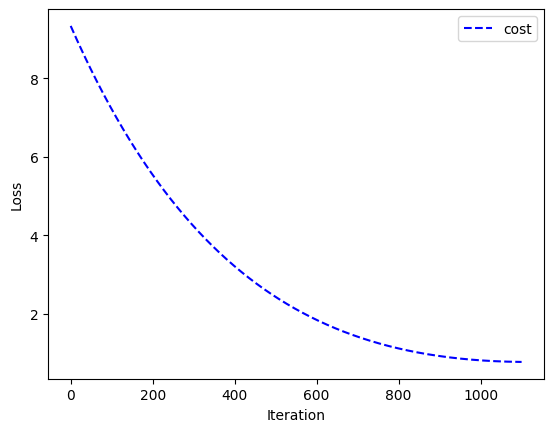

In [44]:
alpha = 0.001
max_iter = 1100
lambda_reg = 0.0001
costs= list()
cost = loss(x,theta, helper,rating)
costs.append(cost)

for itr in range(max_iter):
  g_x, g_theta = gradient(x,theta, helper,rating)
  x = x - alpha*g_x
  theta = theta -alpha * g_theta
  if itr%1 ==0:
    cost = loss(x,theta, helper,rating)
    costs.append(cost)

plt.plot(costs,'b--', label= 'cost')
plt.legend(loc = 'best')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show


In [45]:
'''alpha = 0.001
max_iter = 2
lambda_reg = 0.0001
Losses = list()
for i in list(range(1,30)):
  x = np.random.rand(n_users, i)
  theta = np.random.rand(n_movies, i)
  for itr in range(max_iter):
    g_x, g_theta = gradient(x,theta, helper,rating)
    x = x - alpha*g_x
    theta = theta -alpha * g_theta

  cost = loss(x,theta, helper,rating)
  Losses.append(cost)


plt.plot(Losses,'b--', label= 'cost')
plt.legend(loc = 'best')
plt.xlabel('Feature Dimmension')
plt.ylabel('Loss')
plt.show
'''

"alpha = 0.001\nmax_iter = 2\nlambda_reg = 0.0001\nLosses = list()\nfor i in list(range(1,30)):\n  x = np.random.rand(n_users, i)\n  theta = np.random.rand(n_movies, i)\n  for itr in range(max_iter):\n    g_x, g_theta = gradient(x,theta, helper,rating)\n    x = x - alpha*g_x\n    theta = theta -alpha * g_theta\n\n  cost = loss(x,theta, helper,rating)\n  Losses.append(cost)\n\n\nplt.plot(Losses,'b--', label= 'cost')\nplt.legend(loc = 'best')\nplt.xlabel('Feature Dimmension')\nplt.ylabel('Loss')\nplt.show\n"

In [46]:
rating_pred = x@theta.T

In [47]:
def get_recommendations(user_id, num_recommendations):
  row = rating_pred[user_id-1]
  indices = np.argsort(row)[::-1][:num_recommendations]
  movie_ids = rating_pivot.columns[indices]
  j=1
  for i in movie_ids:
    movie_name = movies.loc[movies['movieId'] == i, 'title'].iloc[0]
    print(f'Recomendation number {j} : {movie_name}')
    j = j+1
  return

get_recommendations(5,5)

Recomendation number 1 : Follow the Fleet (1936)
Recomendation number 2 : Rambo (Rambo 4) (2008)
Recomendation number 3 : Dead or Alive: Final (2002)
Recomendation number 4 : Fantastic Voyage (1966)
Recomendation number 5 : Pawnbroker, The (1964)
